In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sklearn as sk

In [2]:
best_model = load_model('checkpoint.best_256intensity.keras')

I0000 00:00:1738123631.394245   53332 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738123631.416175   53332 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738123631.416319   53332 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738123631.417449   53332 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [29]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8700 - loss: 0.3073


In [30]:
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

'Test loss:0.29285451769828796, Test accuracy: 0.8746397495269775'

In [4]:
negative_path = 'Sheet 5/test_images/'

# initialize storage of data and labels
images2 = []
labels2 = []

for f in os.listdir(negative_path):
    intensity_image = cv2.imread(negative_path + f)
    down_samp = cv2.resize(intensity_image, (256,256), interpolation=cv2.INTER_LINEAR)
    reshaped_intensity = np.mean(down_samp, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    images2.append(rescaled_array)
    #print(file)
    #image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)
    #rescaled_tensor = image_tensor/255.0
    #images2.append(rescaled_tensor)
    labels2.append(0.0)

test_x = np.array(images2)  
test_y = np.array(labels2)  

In [5]:
test_x.shape

(34, 256, 256, 1)

In [7]:
test_loss, test_acc = best_model.evaluate(test_x, test_y)
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

I0000 00:00:1738123690.950945   53449 service.cc:146] XLA service 0x734614004280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738123690.950966   53449 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-01-28 21:08:10.957225: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-28 21:08:10.981795: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.4688 - loss: 1.5663

I0000 00:00:1738123691.498128   53449 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step - accuracy: 0.4700 - loss: 1.5234


'Test loss:1.502020001411438, Test accuracy: 0.47058823704719543'

In [8]:
# Predict the values from the testing dataset
Y_pred_probs = best_model.predict(test_x)
Y_pred = np.array(Y_pred_probs>=.5)
# compute the confusion matrix
#confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Text(0, 0.5, 'freq')

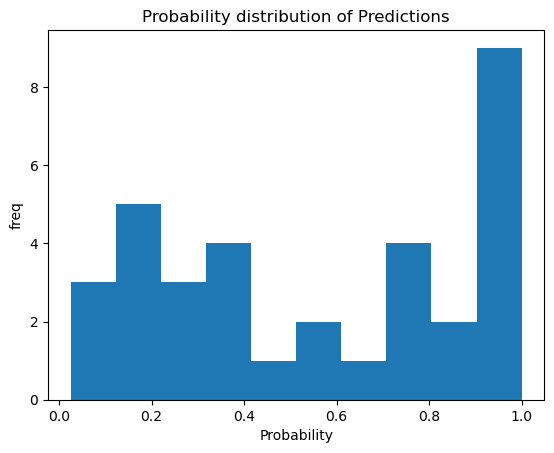

In [9]:
plt.hist(Y_pred_probs.flatten())
plt.title('Probability distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('freq')

Text(0, 0.5, 'freq')

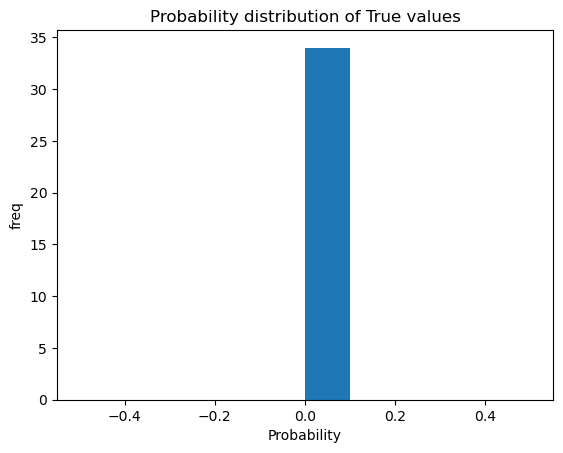

In [10]:
plt.hist(test_y)
plt.title('Probability distribution of True values')
plt.xlabel('Probability')
plt.ylabel('freq')

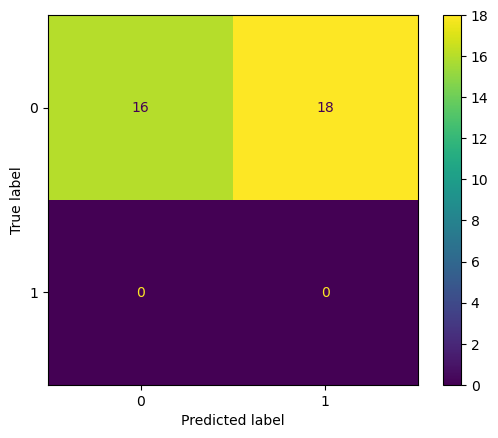

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, Y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [13]:
sk.metrics.accuracy_score(test_y, Y_pred)

0.47058823529411764

In [14]:
sk.metrics.precision_score(test_y, Y_pred)

0.0

In [15]:
sk.metrics.recall_score(test_y, Y_pred)

/home/bea/anaconda3/envs/tf2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0